## Introduction

**Description**<br>
Given the data of years that are spent on schooling in each country we want to verify if it has an impact on life expetancy in these countries.

**Steps**<br>
1. Data analysis
2. Data preprocessing
3. Model
4. Visualization

In [823]:
# base imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset analysis

In [824]:
# loading data from csv file to pandas dataframe
data = pd.read_csv('data.csv')

In [825]:
# inspecting first 5 rows of the dataframe
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [826]:
# checking the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [827]:
# check amount of missing values in each column
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

## Dataset preprocessing

In [828]:
# analyze column names
print(data.columns)

# fix extra spaces at the end of column names
data.columns = [x.strip() for x in data.columns]

# change column names to be lowercase and replace spaces with underscores
data.columns = [x.lower().replace(' ', '_') for x in data.columns]

print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


In [829]:
# choose the most recent data
data = data.loc[data['year'] == 2015]
data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


In [830]:
# get rid of unused columns
data = data[['schooling', 'life_expectancy']]
data.head()

,schooling,life_expectancy
0,10.1,65.0
16,14.2,77.8
32,14.4,75.6
48,11.4,52.4
64,13.9,76.4


In [831]:
# find records with missing values
print(data[data.isna().any(axis=1)])

      schooling  life_expectancy
432         NaN             53.3
689         NaN             78.8
705         NaN             76.0
721         NaN             59.8
2087        NaN             82.3
2103        NaN             72.1
2377        NaN             55.0
2762        NaN             81.2
2778        NaN             61.8
2794        NaN             79.3


In [832]:
# fill missing values with mean of the column
data = data.fillna(data.mean(axis=0))
print(data[data.isna().any(axis=1)])

Empty DataFrame
Columns: [schooling, life_expectancy]
Index: []


## Model

In [833]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split

X = data['schooling'].values
Y = data['life_expectancy'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [834]:
# create linear regression model
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model = lin_model.fit(X_train.reshape(-1, 1), Y_train)
print(f'Linear model parameters: a = {np.round(lin_model.coef_,5)[0]}, b = {np.round(lin_model.intercept_,5)}')


Linear model parameters: a = 2.21749, b = 42.90359


## Visualisation

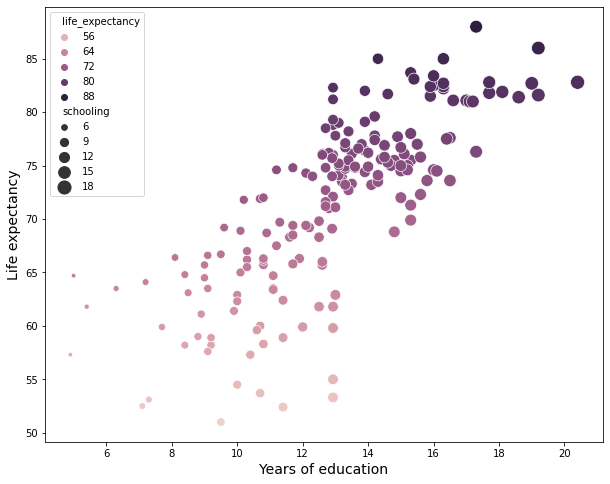

In [836]:
import seaborn as sns

plt.figure(figsize=(10, 8))
plt.xlabel('Years of education', fontsize=14)
plt.ylabel('Life expectancy', fontsize=14)
sns.scatterplot(x='schooling', y='life_expectancy', data=data,
                hue='life_expectancy',     
                size='schooling',
                sizes=(20, 200), 
                legend='brief')
plt.show()

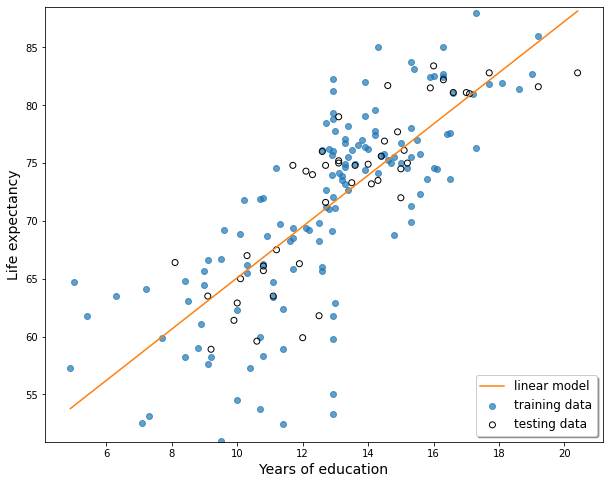

In [835]:
x_axis = np.linspace(start=X.min(), stop=X.max(), num=300)
y_lin_pred = lin_model.predict(x_axis.reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(X_train, Y_train, label='training data', alpha=0.7)
plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='testing data')
plt.plot(x_axis, y_lin_pred, label='linear model', color='tab:orange')
plt.xlabel('Years of education', fontsize=14)
plt.ylabel('Life expectancy', fontsize=14)
plt.legend(fontsize=12, shadow=True, loc='lower right')
plt.ylim([Y.min()-0.1, Y.max()+0.5])
plt.show()